# US Domestic Flight Price Prediction
IS843 Team 1
Contributors:
- Chuheng(Kevin) Yu
- Fu-Yi Pao
- Jinisha Kande
- Shu Wang
- Yuhan Wang

**** 

# Table of Content

>[US Domestic Flight Price Prediction](#scrollTo=e3171661-8582-4bf9-be09-fdd006c594b5)

>[Table of Content](#scrollTo=nAplKWmBaTGW)

>[Problem definition:](#scrollTo=cb460793-2b3f-4d43-bf81-714c836610be)

>[Data Description:](#scrollTo=cb460793-2b3f-4d43-bf81-714c836610be)

>[Source:](#scrollTo=cb460793-2b3f-4d43-bf81-714c836610be)

>[Motivation:](#scrollTo=cb460793-2b3f-4d43-bf81-714c836610be)

>[Data Preparation](#scrollTo=8a06b8c3-eecc-4fc7-b6ba-97bdfa0d9ca2)

>[Summary Statistics](#scrollTo=8dd66714-10ff-4426-9029-f29215e87412)

>[EDA](#scrollTo=ff82cc87-4aa6-4303-9db9-28b45007eff8)

>>[A. Travel Route](#scrollTo=ff82cc87-4aa6-4303-9db9-28b45007eff8)

>>>[Most popular airport for departure and destination](#scrollTo=891765af-dd2d-4780-93e6-daed751625ce)

>>>[Can we identify any cheaper airports for transfer on the same route?](#scrollTo=b944be0d-e30f-4380-9aff-251d02304f9a)

>>[B. Traveling Time and Flight Searches](#scrollTo=ae892128-5ba4-419f-8362-bc9e67b1695f)

>>>[Flight Searches per day](#scrollTo=8c70993d-cfee-47be-98ae-76c0c959967f)

>>>[Flight per day](#scrollTo=ca8a530b-0536-4d43-ba88-db2e1a6b9bae)

>>>[Weekend vs. Weekday](#scrollTo=70f45a88-d024-40ee-bc8a-d41590371e94)

>>>[What is the distribution of the total number of flights for each day of the week over a given period of time?](#scrollTo=f6c28007-7d5e-4c1c-bbeb-1cfb4d497b10)

>>>[Does Flight Type affect average flight prices?](#scrollTo=41858453-f6d5-498f-be85-9d8e0aea29f8)

>>>[What is the most common number of days in advance that people bought their tickets?](#scrollTo=6aa5c853-1751-42fc-88f6-833b2459bba3)

>>[C. Travel Experience](#scrollTo=f4f06f15-8be8-41fa-b7dd-22dc0f08e114)

>>>[Visualization of top 10 airlines](#scrollTo=50f5d312-7947-4e21-98c9-dd9b9ca63846)

>>>[What are the top 10 airlines with the highest average base fare, and how do they compare to each other?](#scrollTo=98c055ec-e22a-414b-acce-b541e6653776)

>>>[Refund situation for different airlines](#scrollTo=96936999-d3b4-4f9e-8e1d-34686cdfef22)

>>>[Refund situation for basic economy airline and non-basic economy airline](#scrollTo=f64e22eb-975a-43fc-b958-4540b6199f16)

>>[D. Price](#scrollTo=672c146d-2d93-46ab-9904-aaaed9a38e57)

>>>[Flight price range](#scrollTo=eafa6d38-e54e-4fac-9d25-8383bcc6d344)

>>>[Price range for transfer airlines](#scrollTo=955ec697-43a2-4aa3-9642-659f15a0fd10)

>>>[How does flight price vary across different times of the year?](#scrollTo=3937fc30-3da1-431f-9d07-b3bbb28a2d4f)

>>>[Is there a difference in price between refundable and non-refundable tickets?](#scrollTo=df8562cd-ba34-4685-8cd7-aa3fb27623f1)

>>>[Flight fare based on the remaining seats](#scrollTo=701a58d7-1714-4941-803f-da45a6e3e2b3)

>>>[Is there a seasonal trend in flight fares for a particular airline](#scrollTo=3d7c3763-9bba-4a13-bb22-5e6cc7dab347)

>>>[Do the most commonly used airports tend to have lower or higher average ticket prices compared to less frequently used airports?](#scrollTo=d4bbcbee-d8b7-4216-92bd-f09efd0f43d6)

>[Regression Analysis](#scrollTo=43475227-2a65-4b30-becd-7c3667025e47)

>>[Linear Regression](#scrollTo=74943127-44aa-400e-8d2e-9d79bc95c83e)

>>[Random Forest Regression](#scrollTo=ed791277-02b3-4717-98d4-c05b0bedc72f)

>>[Feature Importance](#scrollTo=7665f76d-2fac-44b1-b31d-b494461933a1)

>>[Fit with the test dataset](#scrollTo=04d3a67d-720a-425d-9662-a241dbf7617f)

>[Conclusion](#scrollTo=61b65d11-6411-4f39-a435-3b67d4e4a65e)

>[Challenges We Faced :](#scrollTo=8kBZb53nPQz8)



****

# Report Summary

In this study, we employed PySpark and Pandas to investigate pricing factors impacting US domestic flight fares. We conducted exploratory data analysis and implemented linear regression and random forest regression models. Our findings revealed that customers can achieve cost savings by opting for a non-refundable, direct flight ticket and initiating their search 45 days prior to the actual flight date. For future research, we recommend extending the dataset to encompass a full year and include international flight data. Additionally, given increased time and computing resources, we could explore additional regression models to enhance our analysis.

***
# Problem definition: 
Our goal is to identify the key factors of flight prices between 04/16/2022 and 10/05/2022  to generate predictions for our customer.

To achieve this, we will use PySpark for EDA and regression modeling on a large-scale dataset of flight prices and related variables such as departure date, arrival date, airline, etc. Our primary goal will be to identify the factors that have the greatest impact on flight prices during this time period, and to see the strength of these relationships using statistical models.

Afterwards, we shall apply machine learning and regression techniques to develop insights for airfare costs relying on crucial components. These forecasts will offer customers perspectives concerning the ideal timing and price point when they should purchase plane tickets so as to make their expenses more efficient. By doing this, it is our intention to acquire a deeper knowledge of what prompts changes in flight fares.

# Data Description:

This dataset contains information on purchasable flight tickets available on Expedia between 2022-04-16 and 2022-10-05, to/from the following airports: ATL, DFW, DEN, ORD, LAX, CLT, MIA, JFK, EWR, SFO, DTW, BOS, PHL, LGA, IAD, OAK. The dataset is available in compressed CSV and Apache Parquet formats.

The dataset consists of 28 columns with the following information:

| Attribute | Defnition |
| ----------- | ----------- |
|legId | An identifier for the flight.|
|searchDate| The date (YYYY-MM-DD) on which this entry was taken from Expedia.|
|flightDate| The date (YYYY-MM-DD) of the flight.|
|startingAirport| Three-character IATA airport code for the initial location.|
|destinationAirport| Three-character IATA airport code for the arrival location.|
|fareBasisCode| The fare basis code.|
|travelDuration| The travel duration in hours and minutes.|
|elapsedDays| The number of elapsed days (usually 0).|
|isBasicEconomy| Boolean for whether the ticket is for basic economy.|
|isRefundable| Boolean for whether the ticket is refundable.|
|isNonStop| Boolean for whether the flight is non-stop.|
|baseFare| The price of the ticket (in USD).|
|totalFare| The price of the ticket (in USD) including taxes and other fees.|
|seatsRemaining| Integer for the number of seats remaining.|
|totalTravelDistance| The total travel distance in miles. This data is |sometimes missing.|
|segmentsDepartureTimeEpochSeconds| String containing the departure time (Unix time) for each leg of the trip. The entries for each of the legs are separated by '||'.|
|segmentsDepartureTimeRaw| String containing the departure time (ISO 8601 format: YYYY-MM-DDThh:mm:ss.000±[hh]:00) for each leg of the trip. The entries for each of the legs are separated by '||'.|
|segmentsArrivalTimeEpochSeconds| String containing the arrival time (Unix time) for each leg of the trip. The entries for each of the legs are separated by '||'.|
|segmentsArrivalTimeRaw| String containing the arrival time (ISO 8601 format: YYYY-MM-DDThh:mm:ss.000±[hh]:00) for each leg of the trip. The entries for each of the legs are separated by '||'.|
|segmentsArrivalAirportCode| String containing the IATA airport code for the arrival location for each leg of the trip. The entries for each of the legs are separated by '||'.|
|segmentsDepartureAirportCode| String containing the IATA airport code for the departure location for each leg of the trip. The entries for each of the legs are separated by '||'.|
|segmentsAirlineName| String containing the name of the airline that services each leg of the trip. The entries for each of the legs are separated by '||'.|
|segmentsAirlineCode| String containing the two-letter airline code that services each leg of the trip. The entries for each of the legs are separated by '||'.|
|segmentsEquipmentDescription| String containing the type of airplane used for each leg of the trip (e.g. "Airbus A321" or "Boeing 737-800"). The entries for each of the legs are separated by '||'.|
|segmentsDurationInSeconds| String containing the duration of the flight (in seconds) for each leg of the trip. The entries for each of the legs are separated by '||'.|
|segmentsDistance| String containing the distance traveled (in miles) for each leg of the trip. The entries for each of the legs are separated by '||'.|
|segmentsCabinCode| String containing the cabin for each leg of the trip (e.g. "coach"). The entries for each of the legs are separated by '||'.|



# Source: 
Expedia
Link: https://www.kaggle.com/datasets/dilwong/flightprices
# Motivation: 
As international students who travel a lot between our home country and US, it is crucial for us to find the best value for flight tickets during the summer vacation period.


****

# Data Preparation

In [ ]:
#import
from pyspark.sql import functions as F
from pyspark.sql.functions import col, count
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql.types import (StructType, 
                               StructField, 
                               DateType, 
                               BooleanType,
                               DoubleType,
                               IntegerType,
                               StringType,
                               TimestampType)

#construct schema
flight_schema = StructType([StructField("legId", StringType(), True),
                            StructField("searchDate", StringType(), True),
                            StructField("flightDate", DateType(), True),
                            StructField("startingAirport", StringType(), True),
                            StructField("destinationAirport", StringType(), True),
                            StructField("fareBasisCode", StringType(), True),
                            StructField("travelDuration", StringType(), True),
                            StructField("elapsedDays", IntegerType(), True ),
                            StructField("isBasicEconomy", BooleanType(), True),
                            StructField("isRefundable", BooleanType(), True),
                            StructField("isNonStop", BooleanType(), True),
                            StructField("baseFare", DoubleType(), True),
                            StructField("totalFare", DoubleType(), True),
                            StructField("seatsRemaining", IntegerType(), True),
                            StructField("totalTravelDistance", IntegerType(), True),
                            StructField("segmentsDepartureTimeEpochSeconds", IntegerType(), True),
                            StructField("segmentsDepartureTimeRaw", TimestampType(), True),
                            StructField("segmentsArrivalTimeEpochSeconds", IntegerType(), True),
                            StructField("segmentsArrivalTimeRaw", TimestampType(), True),
                            StructField("segmentsArrivalAirportCode", StringType(), True),
                            StructField("segmentsDepartureAirportCode", StringType(), True),
                            StructField("segmentsAirlineName", StringType(), True),
                            StructField("segmentsAirlineCode", StringType(), True),
                            StructField("segmentsEquipmentDescription", StringType(), True),
                            StructField("segmentsDurationInSeconds", IntegerType(), True),
                            StructField("segmentsDistance", IntegerType(), True ),
                            StructField("segmentsCabinCode", StringType(), True)
                            ])

In [ ]:
data_path = "gs://is843-teamproject/itineraries.csv"

In [ ]:
 #read dataset
 data = spark.read.format("csv")\
  .option("header", "true")\
  .schema(flight_schema)\
  .load(data_path)

In [ ]:
data.printSchema()

root
 |-- legId: string (nullable = true)
 |-- searchDate: string (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- fareBasisCode: string (nullable = true)
 |-- travelDuration: string (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: boolean (nullable = true)
 |-- isRefundable: boolean (nullable = true)
 |-- isNonStop: boolean (nullable = true)
 |-- baseFare: double (nullable = true)
 |-- totalFare: double (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: integer (nullable = true)
 |-- segmentsDepartureTimeEpochSeconds: integer (nullable = true)
 |-- segmentsDepartureTimeRaw: timestamp (nullable = true)
 |-- segmentsArrivalTimeEpochSeconds: integer (nullable = true)
 |-- segmentsArrivalTimeRaw: timestamp (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirp

In [ ]:
data.limit(3).toPandas()

23/05/01 01:57:39 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


legId  searchDate  flightDate startingAirport  \
0  9ca0e81111c683bec1012473feefd28f  2022-04-16  2022-04-17             ATL   
1  98685953630e772a098941b71906592b  2022-04-16  2022-04-17             ATL   
2  98d90cbc32bfbb05c2fc32897c7c1087  2022-04-16  2022-04-17             ATL   

  destinationAirport fareBasisCode travelDuration  elapsedDays  \
0                BOS      LA0NX0MC        PT2H29M            0   
1                BOS      LA0NX0MC        PT2H30M            0   
2                BOS      LA0NX0MC        PT2H30M            0   

   isBasicEconomy  isRefundable  ...  segmentsArrivalTimeEpochSeconds  \
0           False         False  ...                       1650223560   
1           False         False  ...                       1650200400   
2           False         False  ...                       1650218700   

   segmentsArrivalTimeRaw  segmentsArrivalAirportCode  \
0     2022-04-17 19:26:00                         BOS   
1     2022-04-17 13:00:00                         BOS   
2     2022-04-17 18:05:00                         BOS   

   segmentsDepartureAirportCode  segmentsAirlineName  segmentsAirlineCode  \
0                           ATL                Delta                   DL   
1                           ATL                Delta                   DL   
2                           ATL                Delta                   DL   

  segmentsEquipmentDescription  segmentsDurationInSeconds segmentsDistance  \
0                  Airbus A321                       8940              947   
1                  Airbus A321                       9000              947   
2               Boeing 757-200                       9000              947   

  segmentsCabinCode  
0             coach  
1             coach  
2             coach  

[3 rows x 27 columns]

In [ ]:
#chech null values
data.filter(col("totalTravelDistance").isNull()).count()

6094532

We shall fill the missing values with mean in the dataset.

In [ ]:
from pyspark.sql.functions import mean, col
distance_mean = data.select(mean(col('totalTravelDistance'))).collect()[0][0]

# Fill the NAs in the 'Age' column with the mean value
data = data.fillna({'totalTravelDistance': distance_mean})

In [ ]:
# import airport_zipcode dataset
airport_zip_path = "gs://is843-teamproject/GlobalAirportDatabase.csv"
airport_zip_schema= StructType([
    StructField("ICAO Code", StringType(), True),
    StructField("IATA Code", StringType(), True),
    StructField("Airport Name", StringType(), True),
    StructField("City/Town", StringType(), True),
    StructField("Country", StringType(), True),
    StructField("Latitude Degrees", IntegerType(), True),
    StructField("Latitude Minutes", IntegerType(), True),
    StructField("Latitude Seconds", IntegerType(), True),
    StructField("Latitude Direction", StringType(), True),
    StructField("Longitude Degrees", IntegerType(), True),
    StructField("Longitude Minutes", IntegerType(), True),
    StructField("Longitude Seconds", IntegerType(), True),
    StructField("Longitude Direction", StringType(), True),
    StructField("Altitude", IntegerType(), True),
    StructField("Latitude Decimal Degrees", DoubleType(), True),
    StructField("Longitude Decimal Degrees", DoubleType(), True)
])

airport_zipcode = spark.read.format("csv")\
  .option("header", "true")\
  .schema(airport_zip_schema)\
  .load(airport_zip_path)

#join the flight_price and airport_zipcode
flight_airport = data.join(airport_zipcode, data.startingAirport == airport_zipcode['IATA Code'], 'left_outer')

# Summary Statistics

In [ ]:
from pyspark.sql.functions import mean, stddev, min, max

# Calculate summary statistics for numerical columns
summary_data = data.select(
    mean("baseFare").alias("mean_baseFare"),
    stddev("baseFare").alias("stddev_baseFare"),
    min("baseFare").alias("min_baseFare"),
    max("baseFare").alias("max_baseFare")
)

# Show the summary statistics
summary_data.show()

+------------------+------------------+------------+------------+
|     mean_baseFare|   stddev_baseFare|min_baseFare|max_baseFare|
+------------------+------------------+------------+------------+
|292.66285271061804|183.18878337398363|        0.01|     7662.33|
+------------------+------------------+------------+------------+




The summary statistics of the baseFare column:

* **mean_baseFare** is the mean (average) value of the base fare prices, which is approximately 292.66.
* **stddev_baseFare** is the standard deviation of the base fare prices, which is approximately 183.19. This indicates that the base fare prices have a wide range of variation from the mean.
* **min_baseFare** is the minimum base fare price, which is 0.01.
* **max_baseFare** is the maximum base fare price, which is 7662.33.

Overall, the statistics suggest that there is a wide range of base fare prices in the dataset, with a significant variation from the mean value.

# EDA
## A. Travel Route

### Most popular airport for departure and destination
To determine the most popular airport for departure and destination, we will need to analyze the flight price data and count the number of flights departing or arriving at each airport. To add the geographical coordinates of each airport, we import a dataset called "airport_zip" from https://www.partow.net/miscellaneous/airportdatabase that includes longitude and latitude information. This will allow us to plot a map later on.

In [ ]:
# count the number of departure and destination airport
departure_counts = flight_airport.groupBy('startingAirport').agg(count('*').alias('count'))
destination_counts = flight_airport.groupBy('destinationAirport').agg(count('*').alias('count'))

# join
airport_zipcode = airport_zipcode.withColumnRenamed('IATA Code', 'airportCode')
departure_airport_data = airport_zipcode.join(departure_counts, airport_zipcode.airportCode == departure_counts.startingAirport, 'left_outer')
destination_airport_data = airport_zipcode.join(destination_counts, airport_zipcode.airportCode == destination_counts.destinationAirport, 'left_outer')

# convert latitude and longitude
departure_airport_data = departure_airport_data.withColumn('latitude', col('Latitude Decimal Degrees').cast('float'))
departure_airport_data = departure_airport_data.withColumn('longitude', col('Longitude Decimal Degrees').cast('float'))
destination_airport_data = destination_airport_data.withColumn('latitude', col('Latitude Decimal Degrees').cast('float'))
destination_airport_data = destination_airport_data.withColumn('longitude', col('Longitude Decimal Degrees').cast('float'))

# filter count=0
departure_airport_data = departure_airport_data.filter(col('count').isNotNull())
destination_airport_data = destination_airport_data.filter(col('count').isNotNull())

departure_airport_data_pd = departure_airport_data.select('airportCode', 'latitude', 'longitude', 'count').toPandas()
destination_airport_data_pd = destination_airport_data.select('airportCode', 'latitude', 'longitude', 'count').toPandas()

Next, we attempted to identify the top 5 departure and destination airports with the highest volumes. According to the result, the top departure airports are **LGA, BOS, DFW, SFO, and LAX**, while LGA and BOS are the top two departure airports with **5.9 million** and **5.8 million** departure counts, respectively. Similarly, the top destination airports are **LGA, BOS, DFW, ORD, and LAX**. It's interesting to note that SFO appear only in the top departure list. It is possible that SFO airports may have more domestic departures compared to other airports because it is a popular destination for international travelers. These travelers may transfer to domestic flights from this airport to travel within the US.

In [ ]:
top_departure_airports = departure_airport_data_pd.nlargest(5, 'count')
top_destination_airports = destination_airport_data_pd.nlargest(5, 'count')
airport_counts = pd.DataFrame({
    'Top Departure Airports': top_departure_airports['airportCode'],
    'Departure Counts': top_departure_airports['count'],
    'Top Destination Airports': top_destination_airports['airportCode'],
    'Destination Counts': top_destination_airports['count']
})
print(airport_counts)

   Top Departure Airports  Departure Counts Top Destination Airports  \
1                     LGA         5919323.0                      LGA   
2                     BOS         5883876.0                      BOS   
8                     DFW         5674959.0                      DFW   
9                     SFO         5706482.0                      NaN   
11                    NaN               NaN                      ORD   
13                    LAX         8073281.0                      LAX   

    Destination Counts  
1            6093450.0  
2            5801538.0  
8            5957280.0  
9                  NaN  
11           5717699.0  
13           8006721.0  


In [ ]:
import folium
import folium.plugins as plugins

center_location = [39.8283, -98.5795]
zoom_level = 4
m = folium.Map(location=center_location, zoom_start=zoom_level)

# label
departure_color = 'blue'
destination_color = 'red'

# departure
for index, row in departure_airport_data_pd.iterrows():
    count = row['count']
    airport_code = row['airportCode']
    airport_name = row['airportCode']
    latitude = row['latitude']
    longitude = row['longitude']
    radius=row['count']/150000
    folium.CircleMarker(location=[latitude, longitude], radius=radius, color=departure_color, fill_color=departure_color, fill_opacity=0.7).add_to(m)
    folium.Marker(location=[latitude, longitude], tooltip=airport_name, icon=None).add_to(m)

# destination
for index, row in destination_airport_data_pd.iterrows():
    count = row['count']
    airport_code = row['airportCode']
    airport_name = row['airportCode']
    latitude = row['latitude']
    longitude = row['longitude']
    radius=row['count']/150000
    folium.CircleMarker(location=[latitude, longitude], radius=radius, color=destination_color, fill_color=destination_color, fill_opacity=0.7).add_to(m)
    folium.Marker(location=[latitude, longitude], tooltip=airport_name, icon=None).add_to(m)

# Display the map
m

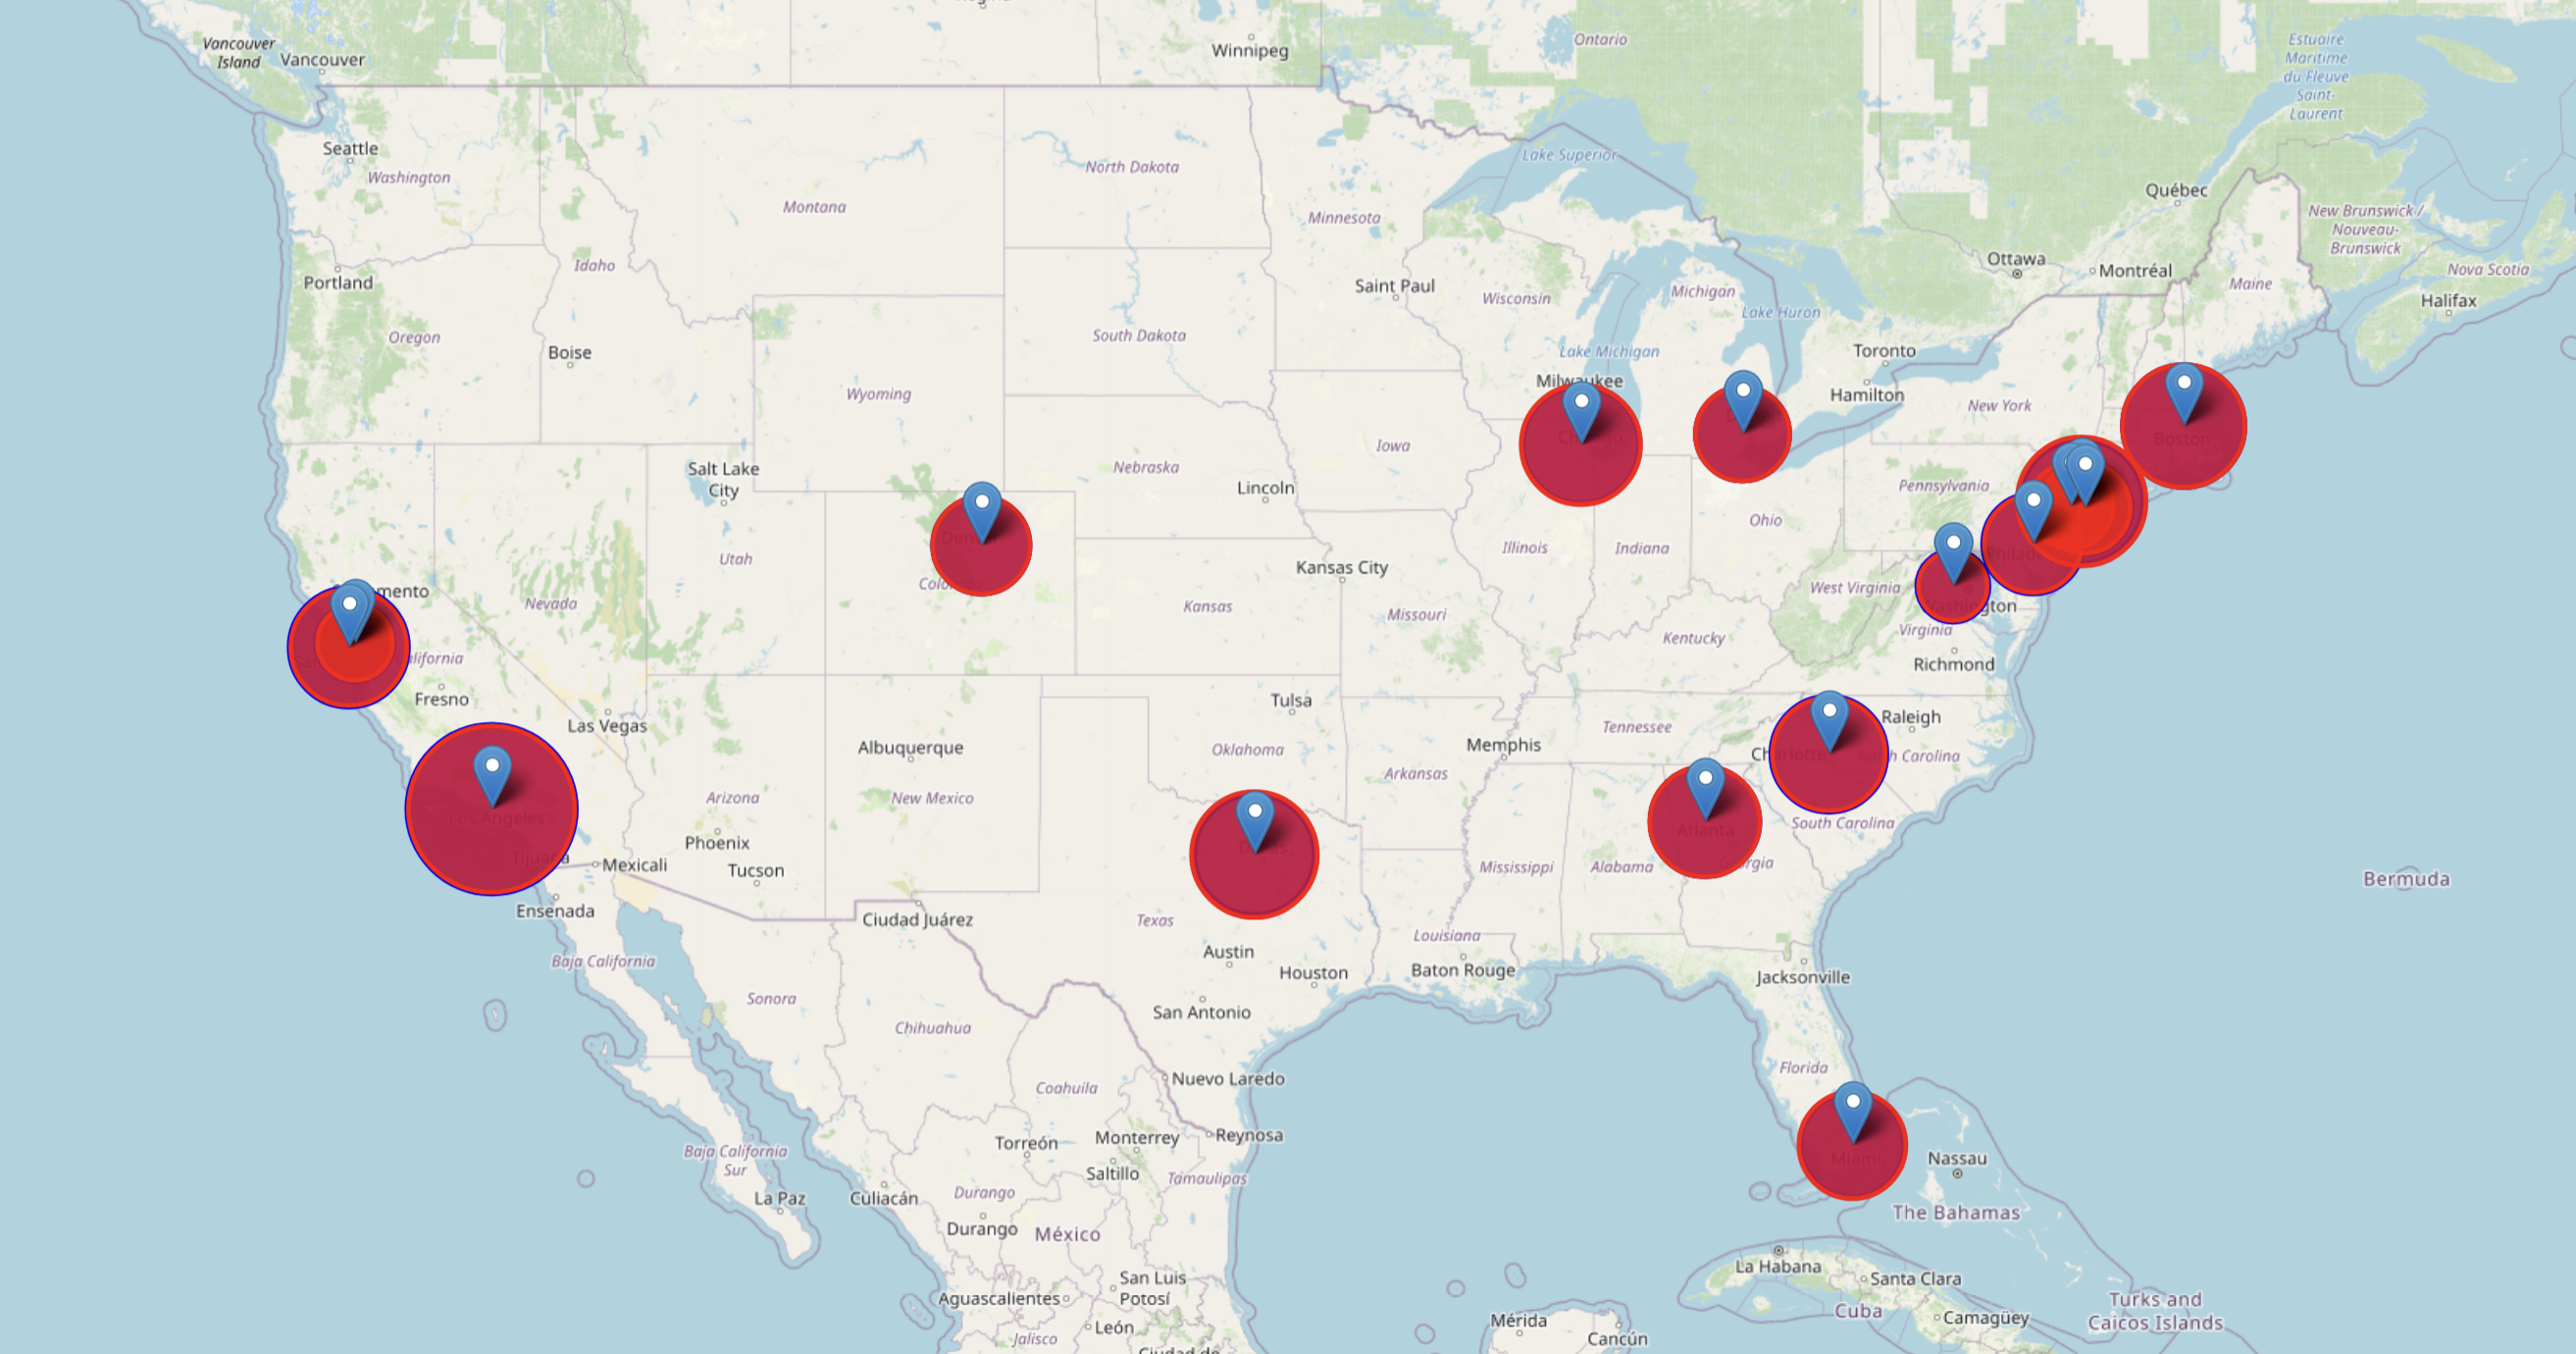

After analyzing the data we collected, a comprehensive map was created which showcases the most commonly used airports across all of mainland USA. From this map it appears that travelers in Bay Area frequent **LAX, SFO and OAK** as their go-to airports for travel purposes. However, on the other side of America along with Central American countries like **EWR, PHL, BOS, LGA, JFK and IAD** are more popular amongst people's choice for air travels based on high volume footfall recorded at these hubs. Similarly further southward towards central America large amounts passengers opt to navigate through **CLT, ATL, DTW, ORD, DFT or DEN airport terminals** when they have flights to catch.Lastly down Southwards around **MIA** region majority airlines is found landing there due being favored by many travellers.

### Can we identify any cheaper airports for transfer on the same route?

After identifying that commonly used airports tend to have lower average ticket prices compared to less frequently ones, it is important to consider the cost of traveling on these routes. It is possible that there are alternative routes or airports that could be used for transfers that offer cheaper fares, even if it requires some extra travel time or inconvenience. By analyzing the data and exploring potential alternative routes, travelers may be able to save money on their travels without compromising on the overall experience.

In [ ]:
from pyspark.sql.functions import col, avg
    
# group by route and isNonStop for average price
route_nonstop_prices = data.groupBy('startingAirport', 'destinationAirport', 'isNonStop').agg(avg('totalFare').alias('averagePrice'))
# pivot
route_nonstop_prices_pivot = route_nonstop_prices.groupBy('startingAirport', 'destinationAirport').pivot('isNonStop').agg(avg('averagePrice'))\
    .withColumnRenamed('true', 'direct') \
    .withColumnRenamed('false', 'transfer')

# calculate the price difference
route_nonstop_prices_pivot = route_nonstop_prices_pivot.withColumn('price_diff', col('direct')- col('transfer'))

# print
route_nonstop_prices_pivot.filter(route_nonstop_prices_pivot['price_diff'].isNotNull()).orderBy('price_diff').show()

+---------------+------------------+------------------+------------------+-------------------+
|startingAirport|destinationAirport|          transfer|            direct|         price_diff|
+---------------+------------------+------------------+------------------+-------------------+
|            OAK|               CLT| 649.2052750516974|145.88166666666666|-503.32360838503075|
|            PHL|               OAK| 639.3821237877291| 176.6739272400051|  -462.708196547724|
|            OAK|               PHL| 630.1115130617192|175.84175828460033| -454.2697547771188|
|            EWR|               OAK| 551.1945657147647|165.99479651162798| -385.1997692031367|
|            OAK|               EWR| 555.2165603097658| 171.5388997555013| -383.6776605542645|
|            MIA|               JFK| 517.5990825754649|170.54365017030392|-347.05543240516096|
|            JFK|               MIA|482.71908048406084|162.73073227811696| -319.9883482059439|
|            OAK|               DEN| 413.645918213

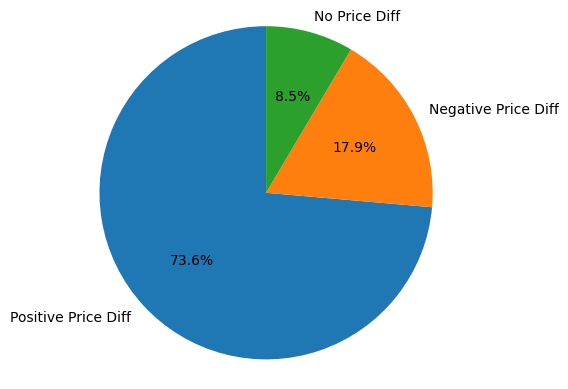

In [ ]:
import pyspark.sql.functions as F

# count price_diff into +,- and null
price_diff_counts = route_nonstop_prices_pivot.select(F.when(route_nonstop_prices_pivot['price_diff'] > 0, 1)
                                                       .when(route_nonstop_prices_pivot['price_diff'] < 0, -1)
                                                       .otherwise(0)
                                                       .alias('price_diff_sign')) \
                                               .groupBy('price_diff_sign') \
                                               .count() \
                                               .collect()

# Extract the counts and labels for the pie chart
counts = [x['count'] for x in price_diff_counts]
labels = ['Positive Price Diff', 'Negative Price Diff', 'No Price Diff']

# Plot the pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

# Display the chart
plt.show()

In our analysis, we found that 73.6% of the time, the average transfer price is higher than the direct price for the same route. However, there still remain 17.9% of cases where it is more beneficial to take a transfer flight on the same route. It is important to note that the use of average prices may be influenced by other factors such as airline and flight time. 

In [ ]:
route_nonstop_prices_pivot.filter(route_nonstop_prices_pivot['price_diff'] > 0).show()

+---------------+------------------+------------------+------------------+------------------+
|startingAirport|destinationAirport|          transfer|            direct|        price_diff|
+---------------+------------------+------------------+------------------+------------------+
|            CLT|               MIA|  279.457919788519| 309.0484195580098|29.590499769490805|
|            ATL|               LGA|  197.615630440518| 202.9059069547673| 5.290276514249285|
|            BOS|               DEN| 341.2686678449074|343.63558520047246|2.3669173555650787|
|            DEN|               CLT|351.40091004439154| 363.1129202636077|11.712010219216154|
|            SFO|               CLT| 516.4220152558999| 564.6388539735315| 48.21683871763162|
|            OAK|               DFW|419.42914046832135| 723.5999999999999|304.17085953167856|
|            PHL|               SFO|  494.225180078293| 495.8111418395136|1.5859617612205739|
|            DTW|               SFO| 494.4565768732749| 496.

Flights with nonstop routes where the direct flight is more expensive than a flight with a transfer. The output includes the starting airport, the destination airport, the transfer price, the direct price, and the price difference

## B. Traveling Time and Flight Searches

### Flight Searches per day

In [ ]:
from pyspark.sql.functions import year

# assuming you have a SparkSession called 'spark' and a DataFrame called 'df' with a time variable column called 'timestamp'
year_to_filter = 2022

filtered_df = data.filter(year(data.flightDate) == year_to_filter)

In [ ]:
flight_per_month = data.groupBy(F.date_format(F.col("flightDate"), 'yyyy-MM').alias("Date")).agg(F.count("legId").alias("flight_count")).orderBy("Date")

# Convert to Pandas
py_flights_per_month = flight_per_month.toPandas()
py_flights_per_month.head()

Date  flight_count
0  2022-04        918956
1  2022-05       7440297
2  2022-06      11774933
3  2022-07      13492890
4  2022-08      17678497

### Flight per day

In [ ]:
from pyspark.sql.functions import date_format

from pyspark.sql.functions import desc

# assuming you have a SparkSession called 'spark' and a DataFrame called 'df' with a date column called 'date_column'
groupedate = data.groupBy(date_format(data.flightDate, 'yyyy-MM-dd').alias('date')).count().orderBy(desc('count'))

groupedate.head()

Row(date='2022-08-30', count=729117)

In [ ]:
groupedate.show()

+----------+------+
|      date| count|
+----------+------+
|2022-08-30|729117|
|2022-09-07|695010|
|2022-09-13|690912|
|2022-09-08|671131|
|2022-08-31|667996|
|2022-08-23|666408|
|2022-08-24|658937|
|2022-09-20|655025|
|2022-08-29|654670|
|2022-09-14|636895|
|2022-10-04|632812|
|2022-09-09|629272|
|2022-08-25|624789|
|2022-08-09|624201|
|2022-08-26|623255|
|2022-09-06|613194|
|2022-09-21|612786|
|2022-09-27|612244|
|2022-09-01|611926|
|2022-09-12|608266|
+----------+------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import date_format

from pyspark.sql.functions import desc
groupdate = data.groupBy(date_format(data.flightDate, 'yyyy-MM-dd').alias('date')).count()
flights_per_day = groupdate.toPandas()

In [ ]:
groupdate.show()

+----------+------+
|      date| count|
+----------+------+
|2022-05-17|275708|
|2022-05-04|176742|
|2022-05-16|248930|
|2022-05-07|187773|
|2022-04-29|112189|
|2022-04-17|  8258|
|2022-05-13|229588|
|2022-04-19| 30702|
|2022-04-18| 16524|
|2022-05-03|179013|
|2022-05-12|222788|
|2022-05-01|105944|
|2022-05-11|237443|
|2022-05-14|216859|
|2022-04-23| 53475|
|2022-05-08|174981|
|2022-04-22| 53384|
|2022-04-20| 41078|
|2022-04-24| 51930|
|2022-04-21| 45888|
+----------+------+
only showing top 20 rows



In [ ]:
data_week = data.withColumn('week', F.weekofyear('flightDate'))

groupweek = data_week.groupBy('week').count()
flights_per_week = groupweek.toPandas()

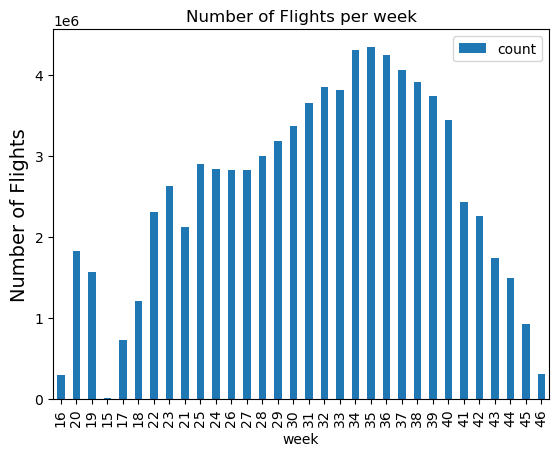

In [ ]:
df3 = flights_per_week.set_index('week')
df3.plot.bar()

plt.ylabel("Number of Flights", fontsize = 14)
plt.title('Number of Flights per week');

In [ ]:
plt.style.use('ggplot')

''

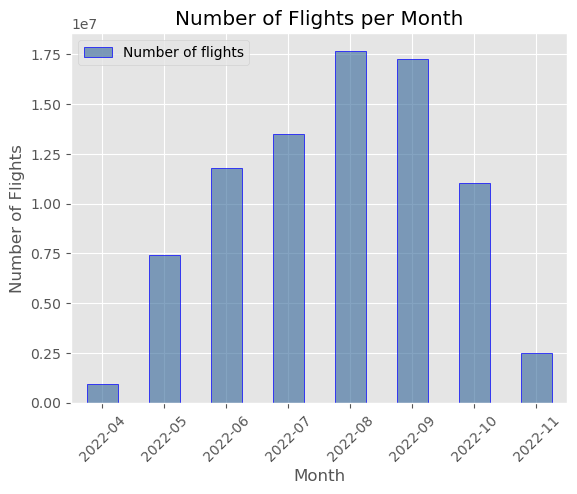

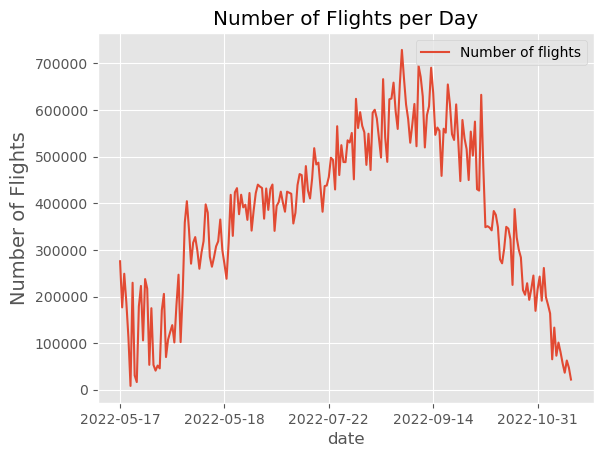

In [ ]:
df.plot.bar(color=(0.2, 0.4, 0.6, 0.6),  edgecolor='blue')
plt.xticks(rotation=45)
plt.ylabel("Number of Flights", fontsize = 12)
plt.xlabel("Month", fontsize = 12)
plt.title('Number of Flights per Month')
plt.legend(["Number of flights"])

df2 = flights_per_day.set_index('date')
df2.plot.line()

plt.ylabel("Number of Flights", fontsize = 14)
plt.title('Number of Flights per Day')
plt.grid(True)
plt.legend(["Number of flights"])
;

From our dataset, we can see that July, August, September have the highest number of flights searches on Expedia. This may be because Summer vacation usually falls in that time span.

### Weekend vs. Weekday

In [ ]:
from pyspark.sql.functions import dayofweek

data_week = data_week.withColumn("is_weekend", dayofweek("flightDate").isin([1,7]).cast("int"))

In [ ]:
data_week.show(10)

+--------------------+----------+----------+---------------+------------------+-------------+--------------+-----------+--------------+------------+---------+--------+---------+--------------+-------------------+---------------------------------+------------------------+-------------------------------+----------------------+--------------------------+----------------------------+--------------------+-------------------+----------------------------+-------------------------+----------------+-----------------+-------------------+----+----------+
|               legId|searchDate|flightDate|startingAirport|destinationAirport|fareBasisCode|travelDuration|elapsedDays|isBasicEconomy|isRefundable|isNonStop|baseFare|totalFare|seatsRemaining|totalTravelDistance|segmentsDepartureTimeEpochSeconds|segmentsDepartureTimeRaw|segmentsArrivalTimeEpochSeconds|segmentsArrivalTimeRaw|segmentsArrivalAirportCode|segmentsDepartureAirportCode| segmentsAirlineName|segmentsAirlineCode|segmentsEquipmentDescriptio

In [ ]:
groupend = data_week.groupBy('is_weekend').count()
flights_weekend = groupend.toPandas()

In [ ]:
flights_weekend

is_weekend     count
0           1  21043976
1           0  61094777

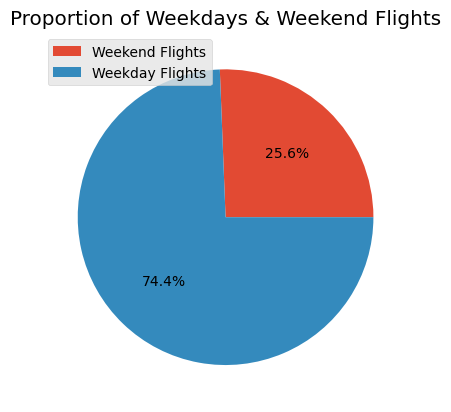

In [ ]:
import matplotlib.pyplot as plt

plt.pie(flights_weekend['count'],  autopct='%1.1f%%')

plt.title('Proportion of Weekdays & Weekend Flights')

plt.legend(["Weekend Flights",'Weekday Flights']);
# Show the pie chart
plt.show()

According to the pie chart its clear that there are 25.6% flight bookings in the dataset that are on a weekend, while the second row shows that there are 74.4% flight bookings that are not on a weekend. This suggests that a significant portion of the flight bookings in the dataset are for weekend travel.

### What is the distribution of the total number of flights for each day of the week over a given period of time?

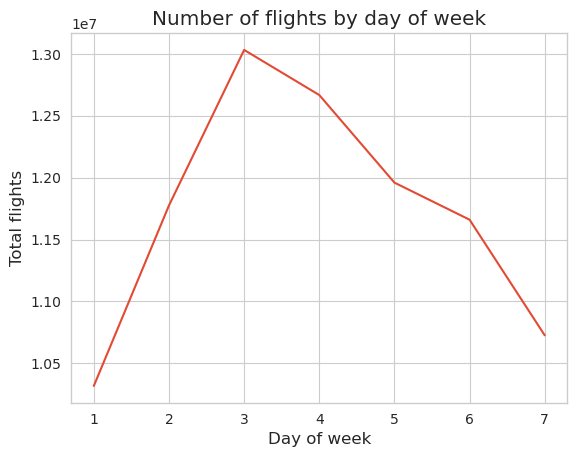

In [ ]:
from pyspark.sql.functions import to_timestamp, year, month, dayofweek, count
import matplotlib.pyplot as plt
import seaborn as sns

# Convert flightDate to a datetime column and extract the year, month, and day of week
flight_airport = flight_airport.withColumn("flightDate", to_timestamp(flight_airport.flightDate, "yyyy-MM-dd HH:mm:ss"))
flight_airport = flight_airport.withColumn("year", year("flightDate")).withColumn("month", month("flightDate")).withColumn("dayOfWeek", dayofweek("flightDate"))

# Calculate the total number of flights for each day of the week
flights_by_day = flight_airport.groupBy("dayOfWeek").agg(count("*").alias("totalFlights")).sort("dayOfWeek")

# Plot the data as a line chart
sns.set_style("whitegrid")
sns.lineplot(x="dayOfWeek", y="totalFlights", data=flights_by_day.toPandas())
plt.xlabel("Day of week")
plt.ylabel("Total flights")
plt.title("Number of flights by day of week")
plt.show()


The x-axis represents the day of the week (1 = Sunday, 2 = Monday, ..., 7 = Saturday) and the y-axis represents the total number of flights. 
It seems that the day of the week with the highest number of flights is Wednesday (3 corresponds to Wednesday).

### Does Flight Type affect average flight prices?

In [ ]:
from pyspark.sql.functions import avg

avg_type_fare = data.groupBy("segmentsEquipmentDescription") \
                  .agg(avg("totalFare").alias("avg_fare")) \
                  .orderBy("avg_fare") \
                  .toPandas()

avg_type_fare.head()

segmentsEquipmentDescription  avg_fare
0                       BOEING 787-9||Boeing 777-200    111.60
1     Boeing 737 MAX 9||Embraer EMB-145||Embraer 170    111.70
2                                 Boeing 757-300||||    112.70
3  Airbus A319||AIRBUS INDUSTRIE A320 SHARKLETS||...    114.07
4             Boeing 787-8||Embraer 175||Airbus A319    124.10

### What is the most common number of days in advance that people bought their tickets?

In [ ]:
from pyspark.sql.functions import datediff
# define advance_date
data = data.withColumn("days_in_advance", datediff("flightDate", "searchDate"))
# group by route for number
common_advance_date=data.groupBy('startingAirport','destinationAirport',"days_in_advance").agg(count('*').alias('tol_tickets')).orderBy('tol_tickets', ascending=False)
common_advance_date.show()

+---------------+------------------+---------------+-----------+
|startingAirport|destinationAirport|days_in_advance|tol_tickets|
+---------------+------------------+---------------+-----------+
|            ATL|               LAX|              2|      15096|
|            ATL|               LAX|              4|      15071|
|            ATL|               LAX|              3|      14939|
|            ATL|               LAX|              5|      14716|
|            ATL|               LAX|              1|      14662|
|            ATL|               LAX|              9|      14250|
|            ATL|               LAX|             11|      14243|
|            ATL|               LAX|             12|      14235|
|            ATL|               LAX|             10|      14225|
|            ATL|               LAX|              8|      14146|
|            ATL|               LAX|              7|      14121|
|            ORD|               LAX|              2|      14109|
|            ORD|        

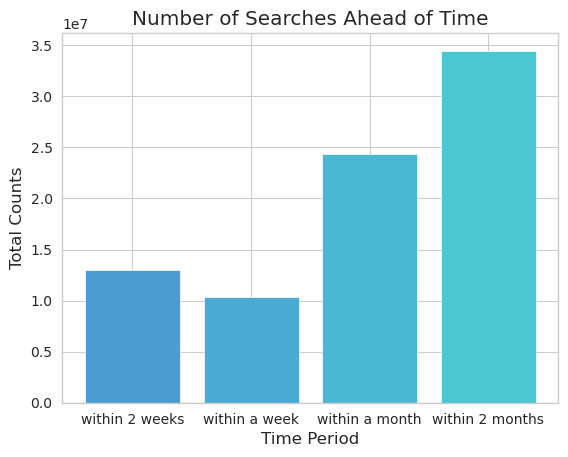

In [ ]:
from pyspark.sql.functions import count, col, when
import matplotlib.pyplot as plt
# group day in advance
data = data.withColumn("search_range", when(col("days_in_advance") < 7, "within a week")
                       .when((col("days_in_advance") >= 7) & (col("days_in_advance") <= 14), "within 2 weeks")
                       .when((col("days_in_advance") > 14) & (col("days_in_advance") <= 30), "within a month")
                       .otherwise("within 2 months"))
# count
counts = data.groupBy("search_range").agg(count("*").alias("count"))
counts_pd = counts.toPandas()

#plot
colors = ['#4B9CD3', '#4BAAD3', '#4BB8D3', '#4BC6D3']
plt.bar(counts_pd["search_range"], counts_pd["count"], color=colors)
plt.title("Number of Searches Ahead of Time")
plt.xlabel("Time Period")
plt.ylabel("Total Counts")
plt.show()

In [ ]:
avg_sea_fare = data.groupBy("days_in_advance") \
                  .agg(avg("totalFare").alias("avg_fare")) \
                  .orderBy("avg_fare") \
                  .toPandas()

avg_sea_fare.head()

days_in_advance    avg_fare
0               45  319.044729
1               46  320.944630
2               44  321.878559
3               40  322.572461
4               43  322.912535

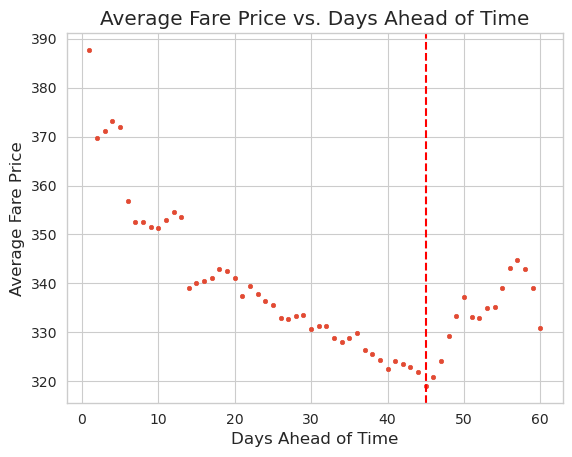

In [ ]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.scatter(avg_sea_fare["days_in_advance"], avg_sea_fare["avg_fare"], s=10)
plt.axvline(x=45, color='r', linestyle='--')
# Set the labels and title of the plot
plt.xlabel("Days Ahead of Time")
plt.ylabel("Average Fare Price")
plt.title("Average Fare Price vs. Days Ahead of Time")

# Display the scatter plot
plt.show()

Since the flight is domestic,approximately 30% of the seearches happens within 2 weeks of the flight date.

## C. Travel Experience

In [ ]:
top_10_airline = data.groupBy('segmentsAirlineName').agg(count('*').alias('tol_tickets')).orderBy('tol_tickets', ascending=False).limit(10)
top_10_airline = top_10_airline.toPandas()

top_10_airline.head(10)

segmentsAirlineName  tol_tickets
0  American Airlines||American Airlines     16296340
1                          Delta||Delta     11351669
2                        United||United     10217320
3                     American Airlines      7453245
4                                 Delta      4855169
5                                United      4531426
6      Spirit Airlines||Spirit Airlines      4215514
7                       JetBlue Airways      3578393
8      JetBlue Airways||JetBlue Airways      3129646
9      Alaska Airlines||Alaska Airlines      1777996

### Visualization of top 10 airlines

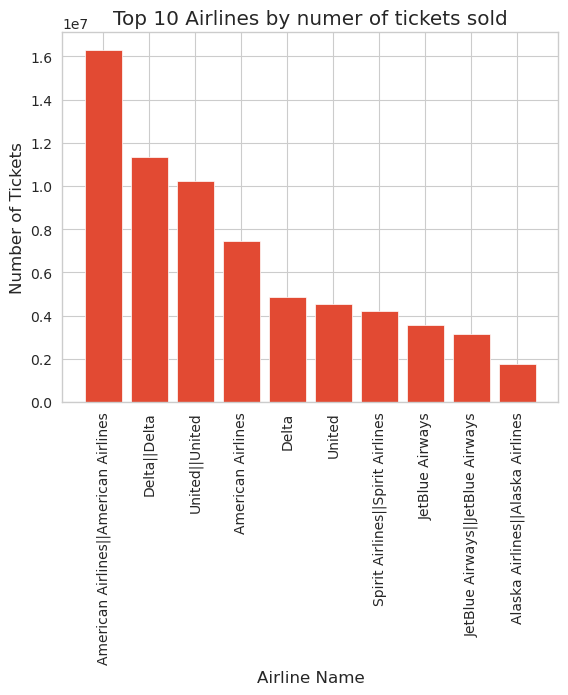

In [ ]:
plt.bar(top_10_airline['segmentsAirlineName'], top_10_airline['tol_tickets'])
plt.title('Top 10 Airlines by numer of tickets sold')
plt.xticks(rotation=90)
plt.xlabel('Airline Name')
plt.ylabel('Number of Tickets')
plt.show()

We can see that **American Airlines** takes the lead followed by **United** and then **Delta**.

### Refund situation for different airlines

In [ ]:
from pyspark.sql.functions import sum, round, when

df2 = data.withColumn("refundable_or_not", when(data["isRefundable"] == True, 1).otherwise(0))
airline_refund= df2.groupBy('segmentsAirlineName').agg(count('*').alias('tol_tickets'), sum(df2['refundable_or_not']).alias('refundable_tickets')) \
                      .where(col('refundable_tickets') > 0)
airline_refund = airline_refund.withColumn('refundable_percentage', round((col('refundable_tickets') / col('tol_tickets') * 100), 2)) \
                      .orderBy('refundable_percentage', ascending=False)

airline_refund = airline_refund.toPandas()
airline_refund.head()

segmentsAirlineName  tol_tickets  \
0             American Airlines||JetBlue Airways          388   
1             JetBlue Airways||American Airlines           13   
2                     Key Lime Air||Key Lime Air        11532   
3  American Airlines||Key Lime Air||Key Lime Air        17087   

   refundable_tickets  refundable_percentage  
0                 388                 100.00  
1                  13                 100.00  
2                 905                   7.85  
3                  26                   0.15

There are four segments:

* American Airlines||JetBlue Airways

* JetBlue Airways||American Airlines

* Key Lime Air||Key Lime Air

* American Airlines||Key Lime Air||Key Lime Air

For the first two segments, all tickets that were purchased were refundable, with 100% refundable percentage. For the third segment, there were 11,532 total tickets purchased, out of which 905 tickets were refundable, resulting in a refundable percentage of 7.85%. For the fourth segment, there were 17,087 total tickets purchased, from which only 26 tickets were refundable which caused a very low refundable percentage of 0.15%.  

### Refund situation for basic economy airline and non-basic economy airline

In [ ]:
airline_type_refund = df2.groupBy('isBasicEconomy').agg(count('*').alias('tol_tickets'),sum(df2['refundable_or_not']).alias('refundable_tickets'))
airline_type_refund = airline_type_refund.withColumn('refundable_percentage', round((col('refundable_tickets') / col('tol_tickets') * 100), 5)) \
                                               .orderBy('refundable_percentage', ascending=False)

print(airline_type_refund.show())

+--------------+-----------+------------------+---------------------+
|isBasicEconomy|tol_tickets|refundable_tickets|refundable_percentage|
+--------------+-----------+------------------+---------------------+
|         false|   70313487|              1332|              0.00189|
|          true|   11825266|                 0|                  0.0|
+--------------+-----------+------------------+---------------------+

None


This table shows the total number of tickets purchased for basic economy and non-basic economy fares, as well as the number of refundable tickets and the percentage of refundable tickets for each fare type.

As seen in the table, more than 70 million tickets purchased were for fares other than basic economy. In comparison, a little over 11 million tickets were of basic economy fare type. A mere fraction of non-basic economy tickets amounting to only around 0.00189% could be refunded while refunds weren't available for any of the basic economy ticket holders.

## D. Price

### Flight price range

Our team wants to conduct basic exploration of flight prices before predicting them. We will start by determining the range of prices, as well as the minimum, maximum, and average prices for each route and for each month.

In [ ]:
data.selectExpr("min(totalFare)", "max(totalFare)","avg(totalFare)").show()

+--------------+--------------+------------------+
|min(totalFare)|max(totalFare)|    avg(totalFare)|
+--------------+--------------+------------------+
|         19.59|       8260.61|340.38684913979085|
+--------------+--------------+------------------+



The above table displays the minimum and maximum total fare values in the dataset, which range from 19.59 dollars  to  8260.61 dollars.

### Price range for transfer airlines

In [ ]:
%matplotlib inline
num_airline = data.groupBy("segmentsAirlineName").avg("totalFare")
df = num_airline.toPandas()
df = df.set_index('segmentsAirlineName')

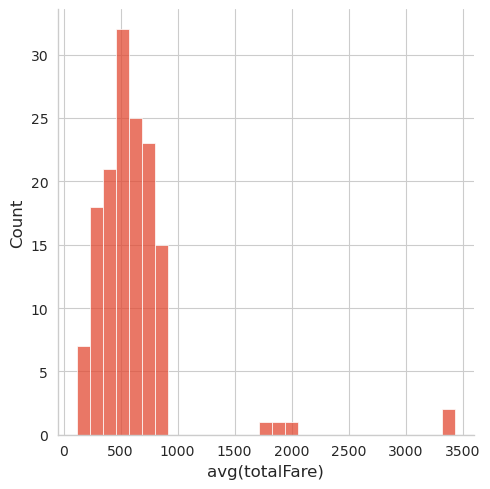

In [ ]:
#for_graph = data.toPandas()
sns.displot(df['avg(totalFare)'])
plt.show()

From the above graph, we can see that most plane ticket prices are below 1,000 dollars for a United States domestic flight. Where there are some flights charge customers around 2,000 dollars and some charge about 3,400 dollars.

In [ ]:
df = df.sort_values(by=['avg(totalFare)'], ascending=False)
df.head(10)

avg(totalFare)
segmentsAirlineName                                          
JetBlue Airways||American Airlines                3431.598462
American Airlines||JetBlue Airways                3429.437655
United||Cape Air||Cape Air||Alaska Airlines       2047.551944
Cape Air||Delta||Delta                            1934.000000
Cape Air||Cape Air||Alaska Airlines               1795.670000
Cape Air||Cape Air||Cape Air||Delta                915.386117
Cape Air||Cape Air||Cape Air||JetBlue Airways      906.900000
Delta||United||Cape Air                            906.010000
Delta||United||United||Delta                       902.343562
Hawaiian Airlines||United||United                  881.312222

The above table shows the average total fare for different combinations of Airlines.
* The highest average fare is for the combination of **JetBlue Airways and American Airlines**, with an average of **3431.598462**.
* The combination of **American Airlines and JetBlue Airways** has a similar average fare of **3429.437655**.
* The third highest average fare is for the combination of **United, Cape Air, Cape Air, and Alaska Airlines**, with an average of **2047.551944**.
* The lowest average fare is for the combination of **Cape Air, Cape Air, and Cape Air, and Delta**, with an average of **915.386117**.

Other combinations include Delta, United, Cape Air, Hawaiian Airlines, and Alaska Airlines

### How does flight price vary across different times of the year?

In [ ]:
num_airline = data.groupBy("flightDate").avg("totalFare")
df = num_airline.toPandas()
df = df.set_index('flightDate')
df = df.sort_values(by=['avg(totalFare)'], ascending=False)

In [ ]:
df.head(10)

avg(totalFare)
flightDate                
2022-04-24      524.246711
2022-06-26      485.382266
2022-06-12      480.520908
2022-05-15      475.938415
2022-05-22      467.165279
2022-07-01      460.841785
2022-06-19      457.104280
2022-06-05      453.164056
2022-07-17      448.814123
2022-07-10      444.209536

The data provided above depicts the average total fare for distinct flight dates. Based on the given information, **April 24th's** flight has recorded as having the highest rate totaling to around **524.246711**, while **July 10th’s** travel expenditure is noted at a nominal expense amounting to nearly **444.209536** only- which makes it have less than most other flights’ traveling expenses so far revealed in this report presently.The conclusion that one can formulate from analysing these facts and figures suggests that throughout June and July months’, airplane tickets are generally expensive, however during springtime such as May and especially earlier month starting April onwards till mid-May or later they are reasonably inexpensive with almost no increase!

### Is there a difference in price between refundable and non-refundable tickets? 

In [ ]:
from pyspark.sql.functions import avg

avg_refund_fare = df2.groupBy("refundable_or_not") \
                  .agg(avg("totalFare").alias("avg_fare")) \
                  .orderBy("avg_fare") \
                  .toPandas()

avg_refund_fare.head()

refundable_or_not     avg_fare
0                  0   340.371449
1                  1  1290.018911

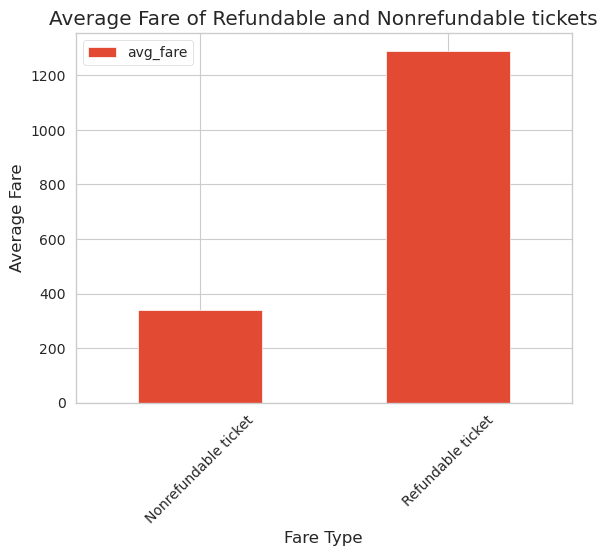

In [ ]:
import matplotlib.pyplot as plt

avg_refund_fare.plot(kind='bar', x='refundable_or_not', y='avg_fare').set_xticklabels(['Nonrefundable ticket', 'Refundable ticket'])

plt.title('Average Fare of Refundable and Nonrefundable tickets')
plt.xlabel('Fare Type')
plt.xticks(rotation=45)
plt.ylabel('Average Fare')

plt.show()

Based on this data, we can see that refundable fares have a much higher average fare than non-refundable fares. This makes sense, as refundable fares usually come with more flexibility and convenience for the traveler, and so they tend to be more expensive.

### Is there a relationship between the number of remaining seats and flight fare?

In [ ]:
avg_airline_seat_fare = data[['seatsRemaining', 'totalFare']]\
                        .groupBy('seatsRemaining') \
                        .agg(avg('totalFare').alias('avg_fare')) \
                        .orderBy('seatsRemaining', ascending=False) \
                
avg_airline_seat_fare.head(5)

[Row(seatsRemaining=10, avg_fare=325.8483017740683),
 Row(seatsRemaining=9, avg_fare=345.47103604916765),
 Row(seatsRemaining=8, avg_fare=408.70424665678286),
 Row(seatsRemaining=7, avg_fare=320.73669746917057),
 Row(seatsRemaining=6, avg_fare=389.5350977570652)]

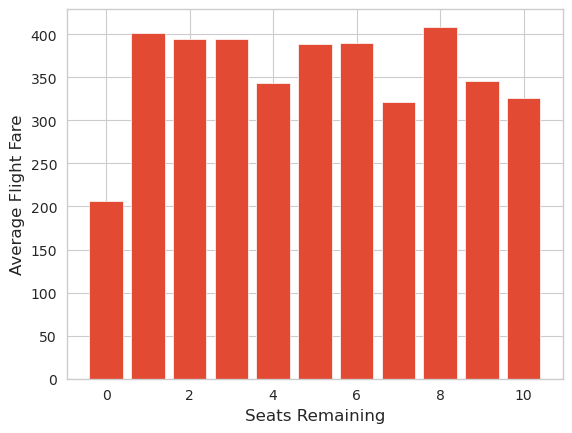

In [ ]:
avg_airline_seat_fare = avg_airline_seat_fare.toPandas()

plt.bar(avg_airline_seat_fare['seatsRemaining'], avg_airline_seat_fare['avg_fare'])
plt.xlabel('Seats Remaining')
plt.ylabel('Average Flight Fare')
plt.show()

The bar chart presents a visual representation of the number of available seats and their corresponding average flight fare. However, the chart does not exhibit a clear trend, making it difficult to draw conclusive insights. As a result, a regression analysis is being conducted in the next step to determine if there is a discernible relationship between the number of remaining seats and the average flight fare.

In [ ]:
import statsmodels.api as sm

# Fit the OLS model
seat_fare_model = sm.OLS.from_formula('avg_fare ~ seatsRemaining', data=avg_airline_seat_fare)
seat_fare_result = seat_fare_model.fit()

# Print the regression summary
print(seat_fare_result.summary())

                            OLS Regression Results                            
Dep. Variable:               avg_fare   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.081
Method:                 Least Squares   F-statistic:                    0.2466
Date:                Mon, 01 May 2023   Prob (F-statistic):              0.631
Time:                        04:36:20   Log-Likelihood:                -59.762
No. Observations:                  11   AIC:                             123.5
Df Residuals:                       9   BIC:                             124.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        341.6940     34.528      9.

/opt/conda/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The coefficient of 2.8980 for seatsRemaining represents the estimated increase in average fare for each additional seat that remains unsold while holding other variables constant. However, since the p-value for this coefficient is 0.631, which is not statistically significant at conventional levels, we cannot reject the null hypothesis. Therefore, there is insufficient evidence to conclude that there is a linear positive relationship between seatsRemaining and avg_fare.

### Is there a seasonal trend in flight fares for a particular airline?

In [ ]:
from pyspark.sql.functions import month

airline_month_fare = df2.select('segmentsAirlineName', 'flightDate', 'totalFare') \
                     .filter(df2.segmentsAirlineName == 'American Airlines||American Airlines') \
                     .withColumn('Month', month('flightDate')) \
                     .groupBy(['segmentsAirlineName', 'Month']) \
                     .mean('totalFare') \
                     .withColumnRenamed('avg(totalFare)', 'avg_fare')

airline_month_fare = airline_month_fare.toPandas()

In [ ]:
airline_month_ticket = df2.select('segmentsAirlineName', 'flightDate', 'totalFare') \
                       .filter(df2.segmentsAirlineName == 'American Airlines||American Airlines') \
                       .withColumn('Month', month('flightDate')) \
                       .groupBy(['segmentsAirlineName', 'Month']) \
                       .count() \
                       .withColumnRenamed('count', 'total_ticket')

airline_month_ticket = airline_month_ticket.toPandas()

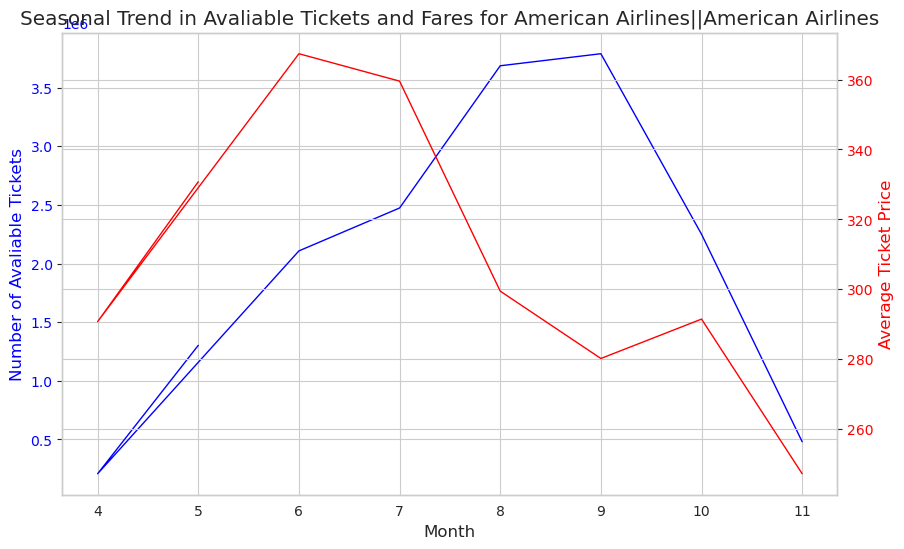

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot for total number of avaliable tickets
ax1.plot(airline_month_ticket['Month'], airline_month_ticket['total_ticket'], linewidth=1, color='blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Avaliable Tickets', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Seasonal Trend in Avaliable Tickets and Fares for American Airlines||American Airlines')

# plot for average ticket price
ax2 = ax1.twinx()
ax2.plot(airline_month_fare['Month'], airline_month_fare['avg_fare'], linewidth=1, color='red')
ax2.set_ylabel('Average Ticket Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

During phase I, we determined that American Airlines holds the top position in terms of the number of available tickets. Therefore, in this phase of the analysis, we have chosen to investigate if American Airlines exhibits any seasonal trends in the flight fare and the number of available tickets.

Based on the graphs we can observe that there is a seasonal trend in both flight fare and number of avaliable tickets for the American Airlines||American Airlines. The number of avaliable tickets is highest in September while the average flight fare is highest in June.

One possible explanation is that September may coincide with the end of the holidays or the return to school, leading to an increase in travel demand. On the other hand, June may be the travel season in certain areas of the U.S., resulting in higher prices.

It is also possible that the company of American Airlines adjusts their pricing strategies accordingly, such as offering lower fares to attract more customers during the highest demand season. Meanwhile, in June, when travel is also frequent, it may be raising the flight fare to capitalize on the tourism season.

### Do the most commonly used airports tend to have lower or higher average ticket prices compared to less frequently used airports?

Given that the most popular airports for departure and destination are primarily situated on the coast, it raises the question of whether their popularity has resulted in higher travel costs. To determine if there is a correlation between airport popularity and travel prices, further analysis is done as follow.

In [ ]:
# average ticket price for each airport
from pyspark.sql.functions import avg

avg_ticket_price = data.groupBy('startingAirport').agg(avg('totalFare').alias('avg_price'))

# join
top_departure_airports = departure_airport_data_pd.nlargest(5, 'count')
top_destination_airports = destination_airport_data_pd.nlargest(5, 'count')
top_airports = top_departure_airports['airportCode'].tolist() + top_destination_airports['airportCode'].tolist()
avg_ticket_price_top_airports = avg_ticket_price.filter(avg_ticket_price.startingAirport.isin(top_airports))
avg_ticket_price_other_airports = avg_ticket_price.filter(~avg_ticket_price.startingAirport.isin(top_airports))

# calculate the average ticket price for the top departure and destination airports, and for all other airports
avg_ticket_price_top_airports_pd = avg_ticket_price_top_airports.toPandas()
avg_ticket_price_other_airports_pd = avg_ticket_price_other_airports.toPandas()
avg_price_top_airports = avg_ticket_price_top_airports_pd['avg_price'].mean()
avg_price_other_airports = avg_ticket_price_other_airports_pd['avg_price'].mean()

# compare the average ticket price
if avg_price_top_airports > avg_price_other_airports:
    print("Commonly used airports tend to have higher average ticket prices compared to less frequently used airports")
else:
    print("Commonly used airports tend to have lower average ticket prices compared to less frequently used airports")

Commonly used airports tend to have lower average ticket prices compared to less frequently used airports


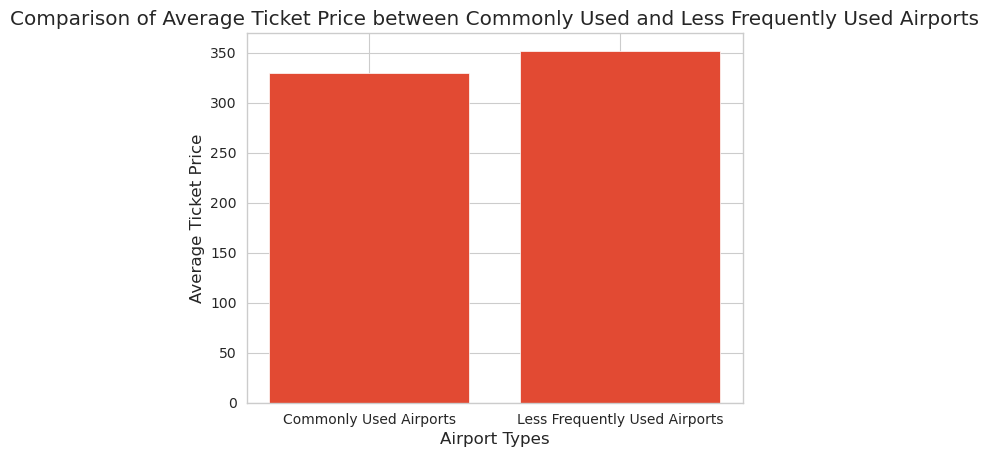

In [ ]:
import matplotlib.pyplot as plt

# create a bar plot of average ticket prices for commonly used airports and less frequently used airports
fig, ax = plt.subplots()
ax.bar(['Commonly Used Airports', 'Less Frequently Used Airports'], [avg_price_top_airports, avg_price_other_airports])

# add axis labels and a title
ax.set_xlabel('Airport Types')
ax.set_ylabel('Average Ticket Price')
ax.set_title('Comparison of Average Ticket Price between Commonly Used and Less Frequently Used Airports')

# show the plot
plt.show()

Commonly used airports tend to have lower average ticket prices compared to less frequently used airports. This may be because less frequently used airports may not have as much demand, allowing airlines to offer lower prices to attract more customers while commonly used airports may have more demand and competition, resulting in higher prices. This may not apply to all cases though.

****

# Regression Analysis

In the following section, our group tried the linear regression and the random forest regression model. But before implementing the model and check the result, we did feature engineering for date and flight duration which is not included in the original dataset. We calculated the data between the search date and the actual flight date and we called it date_difference. The segmentsDurationInSeconds column has all the duration in a trip, but the number is separated by "||" for a flight transfer required trip. Therefore, we concast all of them together to have the sum of the time of a trip.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import to_date, datediff, split, expr

#define the feature columns
feature_columns = ["date_difference", "destinationAirport", "elapsedDays", "totalFare",
                   "isBasicEconomy", "isRefundable", "isNonStop", "seatsRemaining", "totalTravelDistance",
                   "segmentsArrivalAirportCode", "segmentsDepartureAirportCode", "segmentsCabinCode",
                   "segmentsEquipmentDescription", "segmentsAirlineCode", "total_duration"] # Replace these with your actual feature column names

data = data.withColumn("searchDate", to_date("searchDate", "yyyy-MM-dd"))
data = data.withColumn("date_difference", datediff("flightDate", "searchDate"))
data = data.withColumn("duration_list", split("segmentsDurationInSeconds", r"\|\|"))
data = data.withColumn("duration_list", expr("transform(duration_list, x -> cast(x as int))"))
data = data.withColumn("total_duration", expr("aggregate(duration_list, 0, (acc, x) -> acc + x, acc -> acc)"))
selected_data = data.select(feature_columns)

Here we checked the null values for the selected columns, and then we used dropna() methods to eliminate all of the null rows.

In [ ]:
from pyspark.sql.functions import isnull, count, col, when

null_counts = selected_data.agg(*(count(when(isnull(c), c)).alias(c) for c in selected_data.columns))

# Show the null counts for each column
null_counts.show()

+---------------+------------------+-----------+---------+--------------+------------+---------+--------------+-------------------+--------------------------+----------------------------+-----------------+----------------------------+-------------------+--------------+
|date_difference|destinationAirport|elapsedDays|totalFare|isBasicEconomy|isRefundable|isNonStop|seatsRemaining|totalTravelDistance|segmentsArrivalAirportCode|segmentsDepartureAirportCode|segmentsCabinCode|segmentsEquipmentDescription|segmentsAirlineCode|total_duration|
+---------------+------------------+-----------+---------+--------------+------------+---------+--------------+-------------------+--------------------------+----------------------------+-----------------+----------------------------+-------------------+--------------+
|              0|                 0|          0|        0|             0|           0|        0|             0|                  0|                         0|                           0|   

In [ ]:
#remove null rows
selected_data = selected_data.dropna()

## Linear Regression

In [ ]:
from pyspark.ml.feature import RFormula
from pyspark.ml import Pipeline
#train test split
train_data, test_data = selected_data.randomSplit([0.8, 0.2])

#RFormula & linear regression
r_formula = RFormula(formula="totalFare ~ . ", featuresCol="features", labelCol="totalFare")
linear_regression = LinearRegression(featuresCol="features", labelCol="totalFare")

#pipeline
pipeline = Pipeline(stages=[r_formula, linear_regression])

#fit the model
model = pipeline.fit(train_data)

#make predictions
predictions = model.transform(test_data)

23/05/01 05:33:00 WARN Instrumentation: [e83cf1c3] regParam is zero, which might cause numerical instability and overfitting.
23/05/01 05:41:15 WARN Instrumentation: [e83cf1c3] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


We used mean squared error, mean absolute error, root mean squared error, and r-squared as the metrics to evaluate the model. A 0.5358 r-squared value indicates that 53.59% of the variation in the dependent variable can be explained by the independent variables in the model. And we could not evaluate the model's performance while only seeing one's RMSE, MAE and MSE. Therefore, we'll compare the result with the RF regressino model.

In [ ]:
#evaluate the model
from pyspark.ml.evaluation import RegressionEvaluator

evaluator_rmse = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="r2")
evaluator_mse = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="mse")

rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)
mse = evaluator_mse.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (Coefficient of Determination): {r2}")
print(f"Mean Squared Error (MSE): {mse}")

Root Mean Squared Error (RMSE): 111.5526276349478
Mean Absolute Error (MAE): 72.1835980530193
R-squared (Coefficient of Determination): 0.5394235977208834
Mean Squared Error (MSE): 12443.988732261318


## Random Forest Regression

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import RFormula
from pyspark.ml import Pipeline

# Define the RFormula & Random Forest Regression model
r_formula = RFormula(formula="totalFare ~ . ", featuresCol="features", labelCol="totalFare")
rf_regressor = RandomForestRegressor(featuresCol="features", labelCol="totalFare")

#define a pipeline
pipeline = Pipeline(stages=[r_formula, rf_regressor])

#fit the model
rf_model = pipeline.fit(train_data)

#make predictions
predictions = rf_model.transform(test_data)

For the random forest regression model, we used the same metrics to evaluate the performance. It has a lower r-squared value which indicates that around 3% less of the dependent value could be explained all of the dependent variables in the model. The RF model also has a higher RMSE, MAE, and MSE comparing to the linear regression model. Therefore, the linear regressino model has a better fit which in this case.

In [ ]:
#evaluate the model
evaluator_rmse = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="r2")
evaluator_mse = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="mse")

rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)
mse = evaluator_mse.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (Coefficient of Determination): {r2}")
print(f"Mean Squared Error (MSE): {mse}")

Root Mean Squared Error (RMSE): 117.07549294882396
Mean Absolute Error (MAE): 77.52101867979343
R-squared (Coefficient of Determination): 0.4926892514212897
Mean Squared Error (MSE): 13706.67104921013


## Feature Importance

Now, we graph the feature importance bar chart to determine which independent variable explains the dependent variable the most. From the graph, we see isBasicEconomy has the most impact on totalFare which has a -120 coefficient. Then followed by elapsedDays with a coefficient of around -30. All the other independent variables have a small coefficient which indicates that it has a minuscule effect on totalFare. 

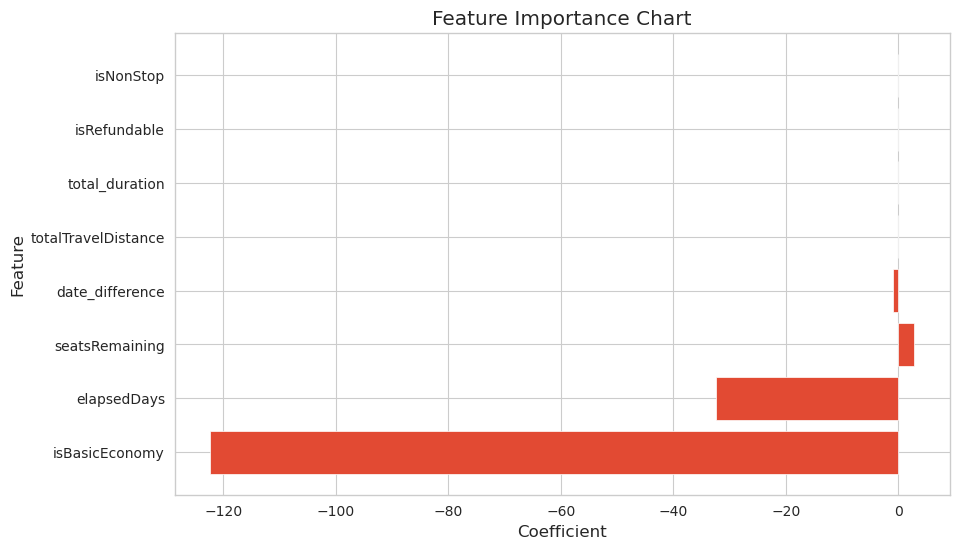

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pipeline_model = model.stages

#extract the feature coefficients from the linear regression model
lr_model = pipeline_model[-1]
coefficients = lr_model.coefficients
r_formula_model = pipeline_model[0]
transformed_data = r_formula_model.transform(train_data)

#extract the feature names from the RFormula
feature_names = transformed_data.schema['features'].metadata['ml_attr']['attrs']['numeric']

#create a pandas df with feature names and their corresponding coefficients
feature_importances_df = pd.DataFrame([(f['name'], coefficients[f['idx']]) for f in feature_names],
                                      columns=['Feature', 'Coefficient'])

#sort the DataFrame
feature_importances_df['abs_coefficient'] = feature_importances_df['Coefficient'].abs()
feature_importances_df = feature_importances_df.sort_values(by='abs_coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance Chart')
plt.show()

## Fit with the test dataset

In [ ]:
#make predictions
predictions = model.transform(test_data)
predictions.select("features", "totalFare", "prediction").show()

+--------------------+---------+------------------+
|            features|totalFare|        prediction|
+--------------------+---------+------------------+
|(108,[0,5,19,20,2...|    140.6|305.29130683611675|
|(108,[0,5,19,20,2...|    140.6| 264.2725583974543|
|(108,[0,5,17,19,2...|    140.6|184.92070538862095|
|(108,[0,5,19,20,2...|    178.6| 251.9621991030042|
|(108,[0,5,19,20,2...|    190.6| 291.0850735033207|
|(108,[0,5,19,20,2...|    190.6| 297.8582345618506|
|(108,[0,5,19,20,2...|    198.6| 247.3039636251558|
|(108,[0,5,19,20,2...|    198.6|233.44695535713026|
|(108,[0,5,19,20,2...|    198.6|257.44156176611637|
|(108,[0,5,19,20,2...|    198.6|228.13589810205917|
|(108,[0,5,19,20,2...|    198.6|244.31239968746422|
|(108,[0,5,19,20,2...|    198.6|222.12214302636607|
|(108,[0,5,19,20,2...|    198.6|278.01802245404406|
|(108,[0,5,19,20,2...|    202.6| 306.7184261643779|
|(108,[0,5,19,20,2...|    202.6|270.94079459197724|
|(108,[0,5,19,20,2...|    202.6|  295.119033903635|
|(108,[0,5,1

# Conclusion

In this study, we examined the primary factors influencing domestic flight pricing by analyzing isBasicEconomy, elapsedDays, seatsRemaining, date_difference, departure, and arrival airports. Through EDA and regression analysis, we identified trends and provided the following recommendations to customers:

- Initiate the flight ticket search approximately 45 days before the actual flight date to secure the lowest price, as searching earlier or later may result in higher costs.
- Opting for non-refundable flights may lead to cost savings.
- Direct flights were found to be more affordable than connecting flights in 73.6% of cases.

To enhance our analysis, a dataset encompassing an entire year would help identify trends and correlations between holidays and ticket prices. Additionally, incorporating international flights would better assist customers planning international travel. With more resources and time, we would also like to investigate additional regression models to improve prediction performance in future studies.

# Challenges We Faced : 


* **Collaboration:** It was also quite difficult for us to collaborate as we had to take turns to put in our code then check for errors and then run it again. It was a time consuming process.

* **Data quality issues:** Our dataset had missing or inconsistent data which made it difficult for us to perform accurate analysis. Cleaning and pre-processing the data was time-consuming and resource-intensive.

* **Scalability issues:** It was difficult to scale the analysis to handle the data volume. The processing time was really long and we had several system crashes. 